 # TMDb Movie Data Analysis Project

# Introduction

The purpose of this project is to evaluate from the provided dataset what properties have an effect on movie revenues. For this project, I will use the TMDb movie data as provided by Udacity.

For the purposed of our analysis, the question that we wish to answer in this analysis is: 'What kinds of properties are associated with movies that have high revenues?'

For the sake of our analysis, the following properties have been selected:

* Does the average rating score that a film has obtained on TMDb have an effect on Revenue?
* Does the movie runtime have an effect on the revenue that a movie has earned?
* Does the release year of a movie have an effect on the amount of revenue a movie has earned?
* Does the adjusted budget of a film have an effect on the revenue that a movie has earned?

Before we start our data analysis, let's import some necessary libraries that we will need in this project.

In [83]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Show the matplotlib inline
%matplotlib inline

# Data Collection and Wrangling

Our first step in data collection will be to read the csv file provided and examine it to see what data exists within the dataset and what type of data is available to us for analysis.

In [85]:
# Explore the data
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

Just by reading the data file, we can see that there are 21 columns and 10866 rows within the dataset. To get an idea of what type of data we are working with here, let's examine what datatypes exist within the dataset.

In [86]:
# What datatypes are we working with here?
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

For the purposes of this study, we will work with the adjusted budgets and revenues. These values show the budget and revenue of the associated movie in terms of 2010 dollars, which account for inflation over time. Because of this, we will drop the following columns from our dataset:

* budget
* revenue
* homepage
* imdb_id
* tagline
* overview

In [87]:
# Drop the original budget and revenue data, homepage data, imdb_id, tagline, overview
movie_df2 = movie_df.drop(['budget','revenue','homepage','imdb_id','tagline','overview'], axis=1)
movie_df2

,id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


Now we have only 15 columns within the datset, but we still have our 10866 rows of data. However, before we proceed with our data analysis, let's explore our data a little bit more.

Let's look for non-null data within our dataset and see if there are any missing values within our dataset that we can clean up

In [88]:
# What information can we find out about our new dataset?
movie_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.2+ MB


As we can see, there seems to be some missing values for keywords, production companies and cast.

Having a quick look at some of the values in keywords, I decided to drop this column from the dataset as I believe that this feature is unlikely to have any significant effect on adjusted revenues for movies. Prehaps if we were running an analysis on online marketing campaigns that use keywords to drive online traffic, this would be a useful feature. But for the purposes of this analysis, we can drop it.

I'm also going to simplify my analysis by dropping the production companies and id from our dataset.

In [89]:
# Drop 'keywords', 'production_companies' and 'id' columns from our dataset
movie_df3 = movie_df2.drop(['keywords','production_companies','id'],axis=1)
movie_df3

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


Now that we have dropped those columns from our dataset, let's take another look at our information to see if we can't clean up this data some more.

In [90]:
# What information can we find out about our new dataset?
movie_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


Ok, it appears we are missing some values in the following columns:

 * Cast
 * Director
 * Genres
 
For the purpose of this analysis, I am going to drop the values that are null from the dataset.

In [91]:
# Drop null values from the dataset
movie_df4 = movie_df3.dropna()
movie_df4

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [92]:
# What information can we find out about our new dataset?
movie_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


Within the dataset, it appears that there are 0 values for adjusted budgets and adjusted revenues for some films. Because we want to analyse what characteristics are associated with film revenues, we will remove adjusted revenues where their values are equal to zero from our dataset.

In [93]:
# Remove 0 values from revenue_adj
movie_df5 = movie_df4[movie_df4.revenue_adj != 0]
movie_df5

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


Let's also remove rows where adjusted budget is equal to zero, as we'd like to analyse the relationship between adjusted budget and adjusted revenues

In [94]:
# Remove 0 values from budget_adj and then print the dataset
movie_df6 = movie_df5[movie_df5.budget_adj != 0]
movie_df6

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


Finally, let's look at popularity. According to the TMDb API pages and support forum, this is determined based on user interactions on their website. For the purposes of this analysis, I will drop it from the dataset.

In [95]:
# Drop 'popularity' column from the dataset
movie_df7 = movie_df6.drop('popularity',axis=1)
movie_df7

,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


Finally, in order to analyse our budget and revenue more effectively, I will convert them from float to int types.

In [96]:
# Convert adjusted budget and adjusted revenue from float to int
movie_df7['budget_adj'] = movie_df7.budget_adj.astype(int)
movie_df7['revenue_adj'] = movie_df7.revenue_adj.astype(int)
# Print out the info to ensure the datatype has changed.
movie_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 11 columns):
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null int32
revenue_adj       3850 non-null int32
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 330.9+ KB


# Data Exploration

Now that we've cleaned our data, let's explore our data to see if we can see what columns have an effect on adjusted revenues. Let's start by looking at some summary statistics on our quantitative data.

In [97]:
# Generate summary statistics from our dataset movie_df6
movie_df7.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,109.212987,528.278442,6.168390,2001.260519,4.428989e+07,1.322919e+08
std,19.913488,880.245090,0.794817,11.285056,4.480837e+07,2.142414e+08
min,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,-2.147484e+09
25%,95.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.824835e+07
50%,106.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.164694e+07
75%,119.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.626769e+08
max,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,1.907006e+09


Minus revenue? That's not very helpful! For simplicity sake, let's find out how many movies have negative revenue and then remove them from the dataset!

In [98]:
print((movie_df7['revenue_adj'] < 0).value_counts())

False    3846
True        4
Name: revenue_adj, dtype: int64


Looks like there are four films that have a negative value for adjusted revenue. Just out of curiousity, let's have a look at these films.

In [99]:
# View the negative adjusted revenue values for films in a DataFrame
movie_negative = movie_df7[movie_df7.revenue_adj < 0]
movie_negative

,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,39575591,-2147483648
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,240886902,-2147483648
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,271692064,-2147483648
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,39289276,-2147483648


### WAIT WHAT?

WOW! That doesn't look right?! It seems that Titanic and Avatar made negative revenues? This isn't the case, as we know that these films made 2.1 billion worldwide (Titanic) and 2.7 billion (Avatar) respectively! I'm not sure how this has been recorded incorrectly in the dataset, but for the sake of simplicity, I'm going to remove these films from the dataset.

While I'm dissapointed that I won't be working with Titanic in my dataset, I'm sure my heart will go on. (Doubt I'll get extra credit for my pun, but after a lot of data cleaning I'm sure you wouldn't mind a pick me up!)

In [100]:
# Remove 'negative' values from revenue_adj and then print the dataset
movie_df8 = movie_df7[movie_df7.revenue_adj > 0]
movie_df8

,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801
5,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,124199945,490314247
6,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,142599937,405355075
7,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,99359956,547749654
8,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,68079970,1064192016
9,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,160999929,785411574


# Data Visualization

Now that we've cleaned our data to make it easy to work with, let's create some visualizations from our data and see if we can't find some interesting trends that answer our questions.

Just to save you the effort of scrolling up to review our research question, it is 'What kinds of properties are associated with movies that have high revenues?'

For the sake of our analysis, the following properties have been selected:

* Does the average rating score that a film has obtained on TMDb have an effect on Revenue?
* Does the movie runtime have an effect on the revenue that a movie has earned?
* Does the release year of a movie have an effect on the amount of revenue a movie has earned?
* Does the adjusted budget of a film have an effect on the revenue that a movie has earned?

To make life a little easier for us in this section, I'm just going to quickly create some variables from our columns in our dataset. That will save us from having to read (or type in my case) movie_df8 all the time!

In [101]:
# Change columns into variables
vote_average = movie_df8['vote_average']
revenue_adj = movie_df8['revenue_adj']
runtime = movie_df8['runtime']
release_year = movie_df8['release_year']
budget_adj = movie_df8['budget_adj']

## Voting Score

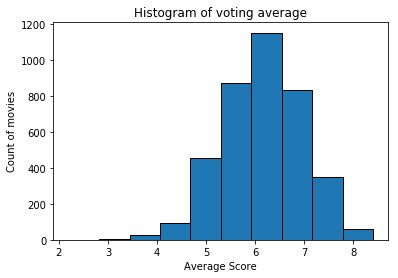

In [102]:
# Plot histogram of TMDb voting average
plt.hist(vote_average,bins=10,histtype='bar',ec='black')

# Label the axis, title
plt.xlabel('Average Score')
plt.ylabel('Count of movies')
plt.title('Histogram of voting average')

# Show the histogram
plt.show()

From the histogram, we can see that a lot of films have a score of around 6. The maximum score for a film seems to be around 8 and the minimum seems to be around 3.

Let's run some summary statistics on the voting average score to see if we can confirm this.

In [103]:
# Obtain the summary statistics for voting average and then print it
print(vote_average.describe())

count    3846.000000
mean        6.167135
std         0.794213
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64


Ok, from our summary statistics, we see that the mean score is 6.2, the maximum voting score is 8.4 and the lowest score is 2.2.

Now let's have a look at the relationship between the score of a film on TMDb and the adjusted revenue that a film has earned.

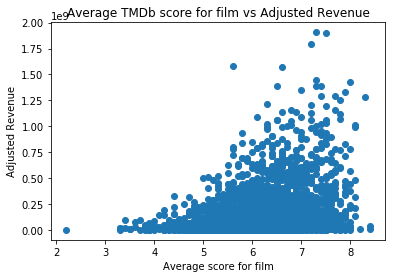

In [104]:
# Scatter plot between Voting score and revenue
plt.scatter(vote_average,revenue_adj)
plt.xlabel('Average score for film')
plt.ylabel('Adjusted Revenue')
plt.title('Average TMDb score for film vs Adjusted Revenue')

# Show the plot
plt.show()

Judging from the scatter plot, it seems that there is a somewhat linear relationship between the average score of film and the adjusted revenue that film has earned. There are some outliers where a film has obtained a high score but not a large revenue value.

Let's have a look at movie runtime to see if this has an effect on adjusted revenue.

## Movie Runtime

Before we examine the relationship between runtime and adjusted revenue, let's dive deeper into our movie runtime data.

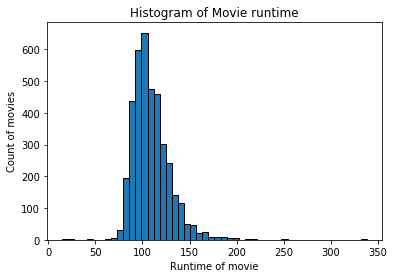

In [105]:
# Plot histogram of Movie Runtime
plt.hist(runtime,bins=50,histtype='bar',ec='black')

# Label the axis, title
plt.xlabel('Runtime of movie')
plt.ylabel('Count of movies')
plt.title('Histogram of Movie runtime')

# Show the histogram
plt.show()

Ok, it looks like that most of the films fall within the runtime of about 75 minutes to about 150 minutes. There does look like there are some major outliers so let's generate some summary statistics to see what's going on.

In [106]:
# Print the summary statistics for our runtime column
print(runtime.describe())

count    3846.000000
mean      109.170827
std        19.856604
min        15.000000
25%        95.000000
50%       105.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64


From our summary statistics, we can see that the average runtime for a movie in our dataset is 109 minutes. The shortest runtime is 15 minutes and the maximum runtime for a film in our dataset is 338 minutes long!

I suspect that a movie's runtime doesn't have a relationship with the revenue earned by a film, but let's create a scatter plot just to confirm it.

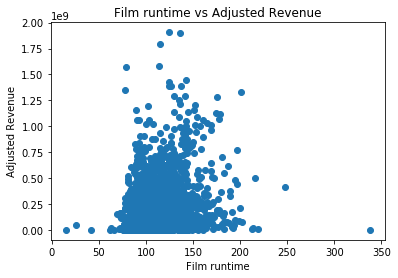

In [107]:
# Scatter plot between movie runtime and revenue
plt.scatter(runtime,revenue_adj)

plt.xlabel('Film runtime')
plt.ylabel('Adjusted Revenue')
plt.title('Film runtime vs Adjusted Revenue')

# Show the plot
plt.show()

Yep, it doesn't look like there's a relationship. Out of interest, that 5 hour film didn't earn that much revenue (I guess no one wanted to pay to sit and watch a film for that long!).

Now let's examine the release year of a film and determine whether or not it has an effect on adjusted revenue earned.

## Release Year

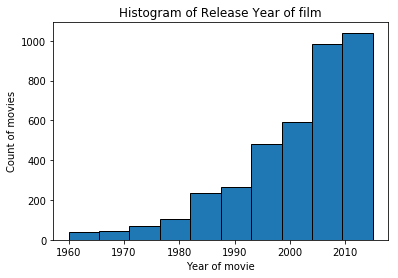

In [108]:
# Plot histogram of Year release
plt.hist(release_year,bins=10,histtype='bar',ec='black')

# Label the axis, title
plt.xlabel('Year of movie')
plt.ylabel('Count of movies')
plt.title('Histogram of Release Year of film')

# Show the histogram
plt.show()

Interesting! Seems that there are lot more modern movies in the dataset than old ones. This could suggest two things:

* Perhaps there's more money in the film industy, so more films are being made. OR;
* TMDb know far more about recent films than they do about older films, meaning that collecting data for these films is a lot harder.

Let's have a look at the relationship between release year and budget to see if there may be a relationship

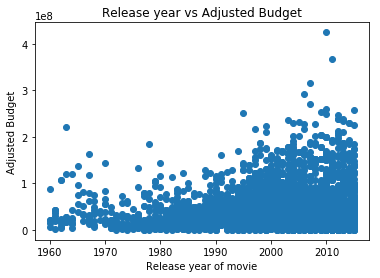

In [109]:
# Scatter plot between release year of film and adjusted budget
plt.scatter(release_year,budget_adj)

plt.xlabel('Release year of movie')
plt.ylabel('Adjusted Budget')
plt.title('Release year vs Adjusted Budget')

# Show the plot
plt.show()

Hmm, the scatter plot doesn't suggest a strong relationship between release year and budget (very slightly postiviely linear). Let's have a look at release year vs revenue

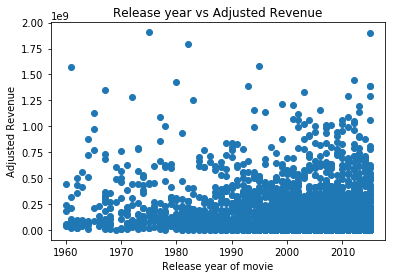

In [110]:
# Scatter plot between release year of film and adjusted revenue
plt.scatter(release_year,revenue_adj)

plt.xlabel('Release year of movie')
plt.ylabel('Adjusted Revenue')
plt.title('Release year vs Adjusted Revenue')

# Show the plot
plt.show()

As with adjusted budget, there appears to be a very slight linear relationship (it appears extremely weak). Because the dataset has a lot more films that were released recently, it would be incorrect to suggest that in this dataset, the release year of a film has any significant effect on the adjusted revenue that a film has earned.

Finally, let's see if the adjusted budget of a film has any relationship with the adjusted revenue that a film has earned

## Budget (Adjusted)

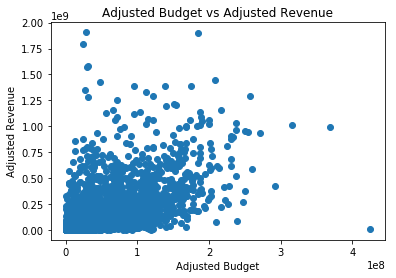

In [111]:
# Scatter plot between adjusted budget of film vs adjusted revenue of film
plt.scatter(budget_adj,revenue_adj)

plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue')
plt.title('Adjusted Budget vs Adjusted Revenue')

# Show the plot
plt.show()

Apart from a couple of outliers, it looks like that there is a positive relationship between the amount of budget a film has vs the amount of revenue that film earned.

This could be due to films with larger budgets having more to spend on advertising, which could increase ticket sales and therefore earn more revenue. There are a few outliers within the scatter graph that suggest that this is not always the case.

# Conclusion

Now that our analysis is completed, we can make the following conclusions:

For the purposed of our analysis, the question that we wish to answer in this analysis is: 'What kinds of properties are associated with movies that have high revenues?'

From out properties selected, we can see that

* The rating of a film on TMDb (voting_average) does have a positive effect on the adjusted revenue that a film has earned. This could be due to the fact that if a film is rated highly among TMDb users, that could persuade potential movie goers to go and see that film.

* The runtime of a movie does not have an effect on the amount of adjusted revenue that a film has earned. The average runtime of a film was 109 minutes, but this does not suggest that the duration of a film has any effect on how much that film will earn.

* The release year of a movie does not have a strong effect on the adjusted revenue that a film has earned. Our dataset contained far more recently made films (2010 onwards) than older films (pre 2000). Because of the distribution of data within our dataset, we cannot determine the effect of release year on adjusted revenue earned.

* The adjusted budget of a film appeared to have a positive effect on the amount of adjusted revenue earned by a film (apart from a couple of notable outliers).

With this in mind, from the properties we selected from our dataset, we can say that both the rating of a film on TMDb and the adjusted budget are somewhat associated with movies that have earned high adjusted revenues.

# Future areas of work

Future areas for further analysis could be performed in the following areas:

* What effect does the genre of a film have on adjusted revenue earned?
* Does the choice of director have an effect on adjusted revenue earned?
* Does the choice of cast have an effect on adjusted revenue earned?
